  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Warning: Some registries failed to update:
│     — /home/jakub/.julia/registries/General — failed to fetch from repo
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/Types.jl:1269


 Resolving package versions...


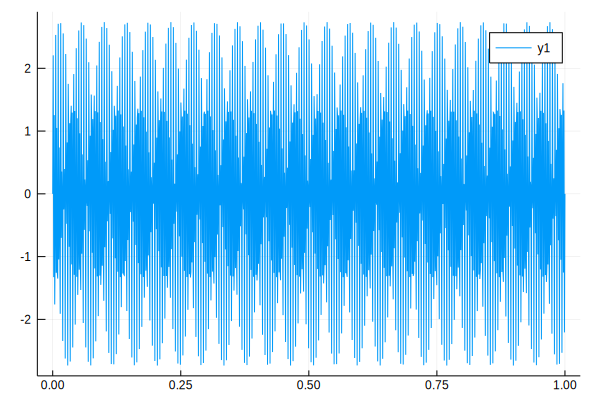

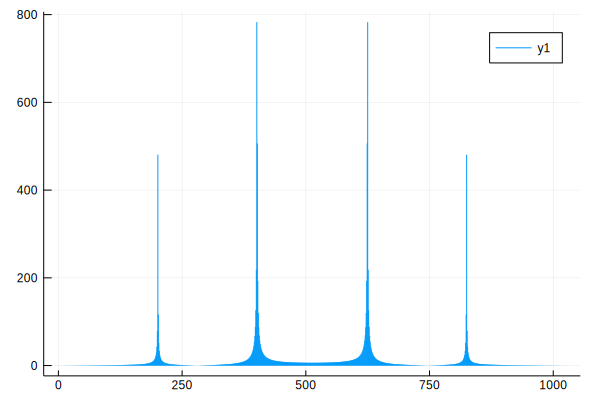

  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


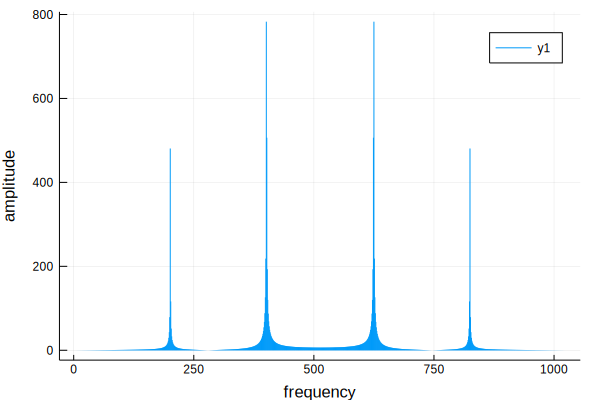

In [1]:
# Task 1 - change the signal to the sum of signals

using Pkg
Pkg.add("FFTW")

using FFTW, Plots

Fs = 1024

t = 0:1/(Fs-1):1

x_task1 = sin.(2*pi*t*200) + 2*sin.(2*pi*t*400)
display(plot(t, x_task1))
xlabel!("frequency")
ylabel!("amplitude")


y_task1 = fft(x_task1)
display(sticks((abs.(fft(x_task1)))))
xlabel!("frequency")
ylabel!("amplitude")



Original cosinus:



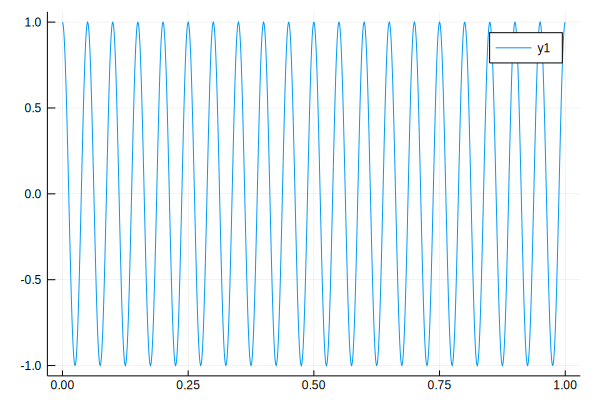


Modified cosinus - with some disturbance:



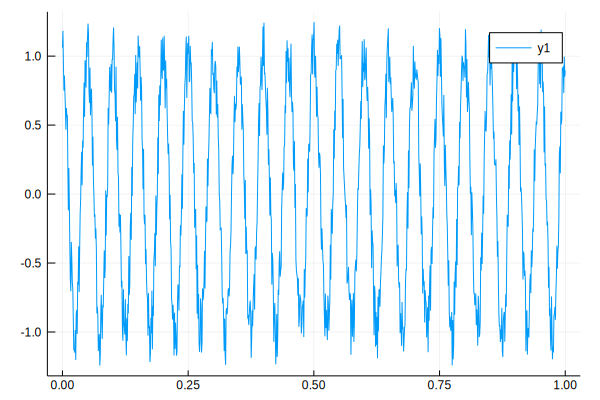


Fourier transform:



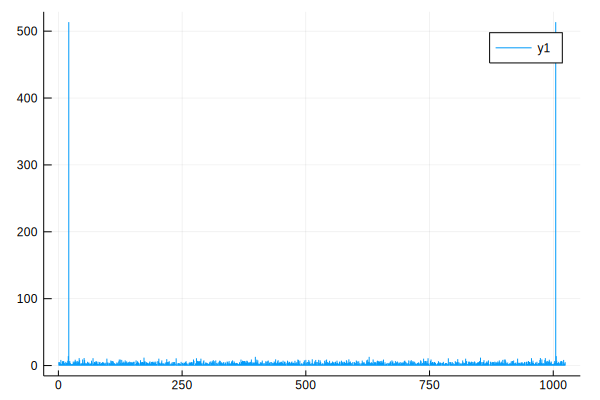


Plot with noise deleted:



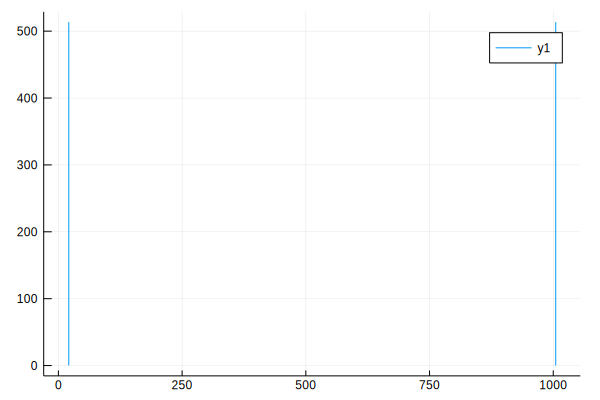


Reversed Fourier transform - for real part:



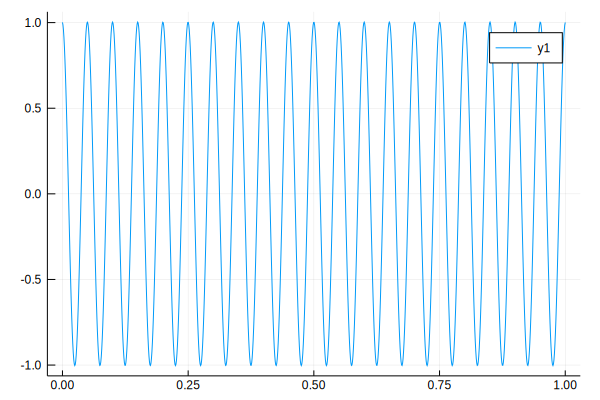

In [6]:
# Task number 2 - noise deleting

Fs = 1024

t = 0:1/(Fs-1):1

x_cos = cos.(4*pi*t*10)

println("\nOriginal cosinus:\n")
flush(stdout)
display(plot(t, x_cos))

# A
for i in 1:length(x_cos)
    x_cos[i] += (rand(Float64)*2 - 1) * 0.25
end

# B
println("\nModified cosinus - with some disturbance:\n")
flush(stdout)
display(plot(t, x_cos))


# C
y_task2 = fft(x_cos)
println("\nFourier transform:\n")
flush(stdout)
display(sticks((abs.(y_task2))))

# D
threshold = 50

for i in 1:length(y_task2)
    if abs(y_task2[i]) < threshold
        y_task2[i] = 0
    end
end

println("\nPlot with noise deleted:\n")
flush(stdout)
display(sticks((abs.(y_task2))))


x_reversed = ifft(y_task2)
println("\nReversed Fourier transform - for real part:\n")
flush(stdout)
display(plot(t, real.(x_reversed)))


In [3]:
# Task number 3 - voice transformation

using Pkg
Pkg.add("WAV")
Pkg.add("PlotlyJS")
Pkg.add("Interpolations")
Pkg.add("Polynomials")
Pkg.add("Dierckx")

function display_fft(fft_y)
    fft_x = 1:length(fft_y)
    fft_y_s = abs.(fft_y[1:20:length(fft_y)])
    fft_x_s = fft_x[1:20:length(fft_y)]
    display(plot(fft_x_s, fft_y_s)) 
end


function play_regular_sound(filename)
    sound, sampling_frequency = wavread(filename)
    channel1 = sound[:,1] 
    wavplay(sound, sampling_frequency)
end


function play_sound_with_fft_effect(filename, offset_x, noise_reduction_level)
    sound, sampling_frequency = wavread(filename)
    
    channel1 = sound[:, 1]
    
    time_array = (0:(length(channel1) - 1)) / sampling_frequency
    
    println("\nOriginal soundtrack\n")
    flush(stdout)
    display(plot(time_array, channel1))
    
    fft_y = fft(channel1)
    
    new_fft_y = Array{Complex{Float64}}(undef, length(fft_y))
    for i in 1:length(fft_y)
        new_fft_y[i] = 0.0 + 0.0im
    end
    
    for i in 1:round(Int, (length(fft_y)/2))
        x = 1 + i + offset_x
        
        if(x > 0 && x < length(fft_y)/2)
            x_floor = floor(Int, x)
            x_ceil = ceil(Int, x)
            
            percentage = x - x_floor
            
            value = fft_y[x_floor] + (fft_y[x_ceil] - fft_y[x_floor]) * percentage
            
            if(abs(value) < noise_reduction_level) # noise reduction
                value = 0 
            end
            
            new_fft_y[i + 1] = value
            new_fft_y[length(fft_y) - i + 1] = conj(value) # mirror reflection - conjecture
        end
    end
    
    
    println("\nOld FFT\n")
    flush(stdout)
    display_fft(fft_y)
    
    println("\nNew FFT\n")
    flush(stdout)
    display_fft(new_fft_y)
    
    
    sound2 = ifft(new_fft_y)
    sound2_real = real.(sound2)
    
    println("\nNew soundtrack\n")
    flush(stdout)
    display(plot(time_array, sound2_real))

    
    wavplay(sound2_real, sampling_frequency)
#     return sound2_real
end



 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


play_sound_with_fft_effect (generic function with 1 method)


Original soundtrack



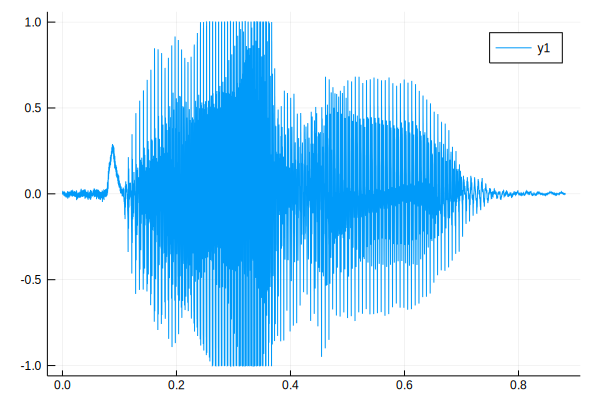


Old FFT



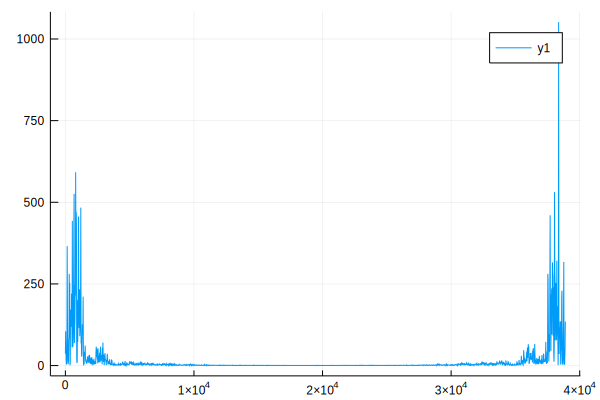


New FFT



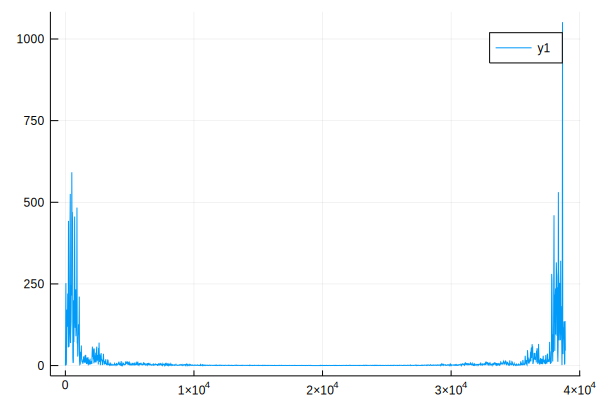


New soundtrack



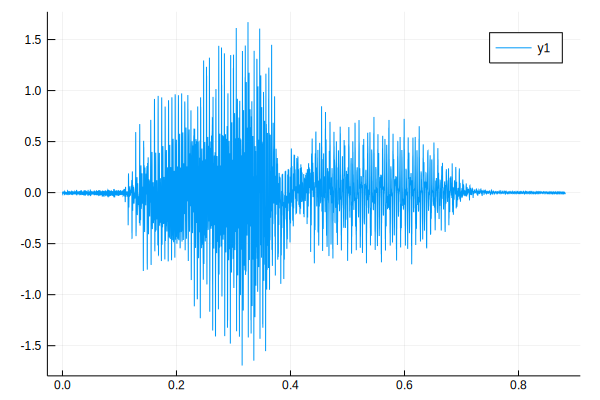

In [14]:
using WAV, FFTW, Plots

# play_regular_sound("halo.wav")

play_sound_with_fft_effect("halo.wav", 300, 0)



Original soundtrack



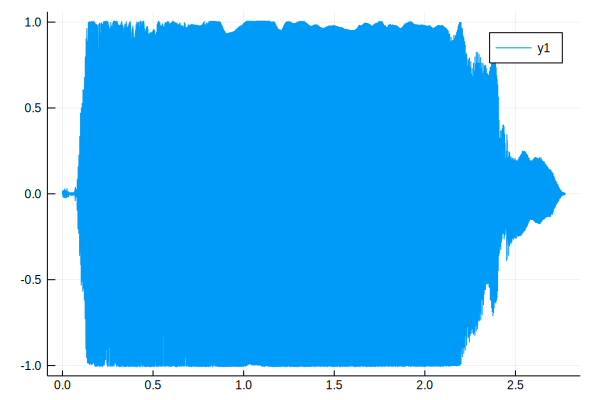


Old FFT



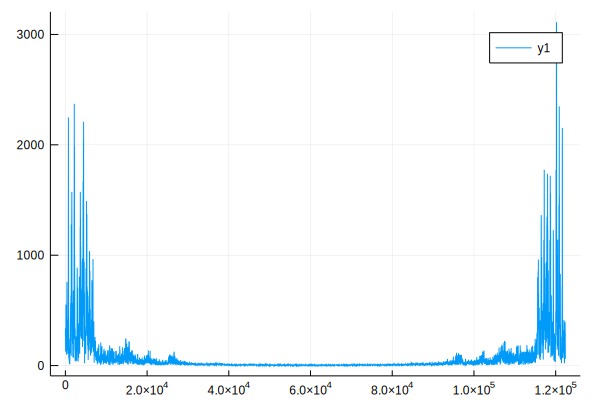


New FFT



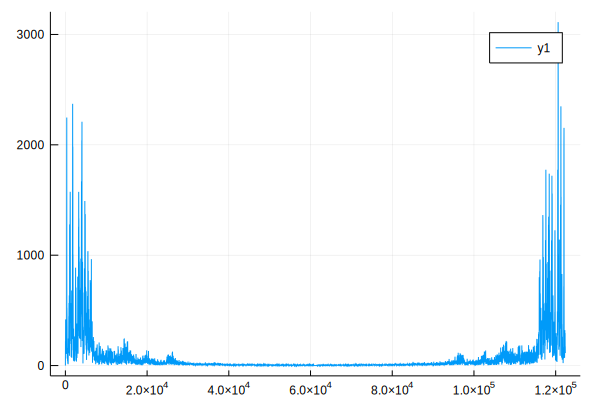


New soundtrack



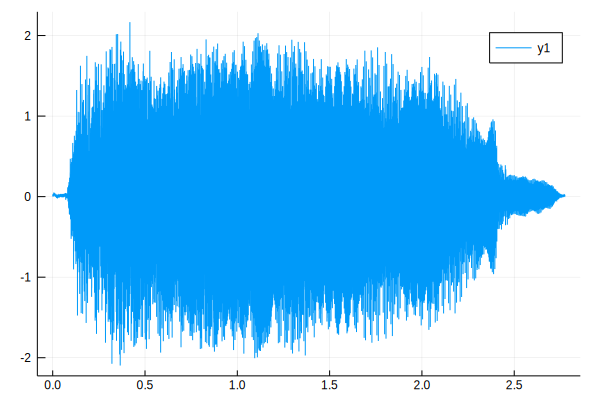

In [8]:
using WAV, FFTW, Plots

play_regular_sound("yyyy.wav")

play_sound_with_fft_effect("yyyy.wav", 400, 0)